In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objs as go
import scipy.optimize as sco

In [ ]:
df = pd.read_csv("Data_PCLab1_Stock.csv")

### Data exploration

In [ ]:
df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


# Task 1

## Sort stocks by date and print the number of stocks

Since the date column contains objects, we need to convert them to datetime objects.

In [ ]:
df.Date = pd.to_datetime(df.Date)
# make the date the index
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2159 entries, 2012-01-12 to 2020-08-11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 168.7 KB


In [ ]:
# order by date
df = df.sort_values(by='Date')
df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:
df.tail()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971
2020-08-11,437.500000,180.130005,30.200001,21.500000,3080.669922,126.750000,1374.390015,1480.319946,3333.689941


In [ ]:
# print the number of stocks
print("Number of stocks: ", len(df.columns.values))

Number of stocks:  9


Out of this 9 columns, one of them is the sp500, which is not properly a stock, but an index of the S&P 500

## Check if data contains any null values

In [ ]:
df.isnull().sum()

AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

No null values found!

## Average market value S&P500

In [ ]:
df['sp500'].describe()

count    2159.000000
mean     2218.749554
std       537.321727
min      1278.040039
25%      1847.984985
50%      2106.629883
75%      2705.810059
max      3386.149902
Name: sp500, dtype: float64

In [ ]:
print('Average sp500 market value: ', df['sp500'].mean())

Average sp500 market value:  2218.7495540592868


## Stock/index with the minimum dispersion (std dev)

In [ ]:
# find the stock with the lowest std dev
df.describe().loc['std']

AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
Name: std, dtype: float64

In [ ]:
print("Stock with the lowest std dev: ", df.describe().loc['std'].idxmin())

Stock with the lowest std dev:  T


## Maximum price Amazon stock

In [ ]:
df['AMZN'].describe()

count    2159.000000
mean      915.665665
std       697.838905
min       175.929993
25%       316.490005
50%       676.010010
75%      1593.645019
max      3225.000000
Name: AMZN, dtype: float64

In [ ]:
print("Max price for AMZN: ", df['AMZN'].max(), " on ", str(df['AMZN'].idxmax())[:-9])

Max price for AMZN:  3225.0  on  2020-08-06


# Task 2

## Plot the data 

In [ ]:
# function that plots the entire dataframe and x axis is the date (which in this case is the index)
def plot_df(df, title="Stock Prices", xlabel="Date", ylabel="Price USD"):
    ax = df.plot(title=title, fontsize=12, figsize=(12, 8))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

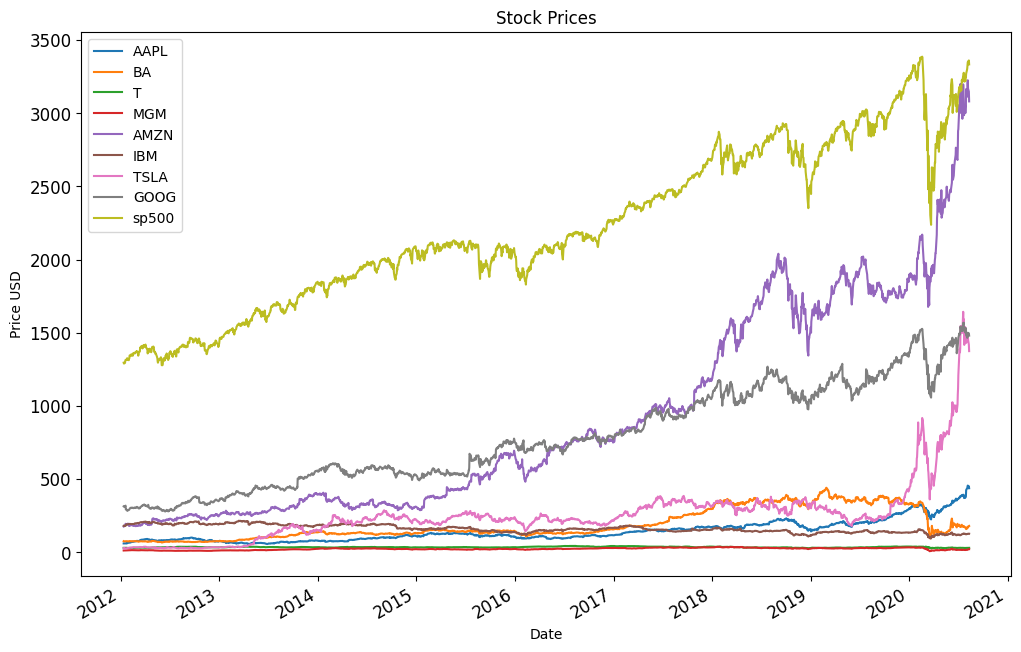

In [ ]:
# plot the entire dataframe
plot_df(df)

# Task 3

## Normalized (scaled) stock prices

In [ ]:
def normalize(df):
    return df / df.iloc[0, :]

# normalize the dataframe
df_norm = normalize(df)

df_norm.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666


## Plot normalized data

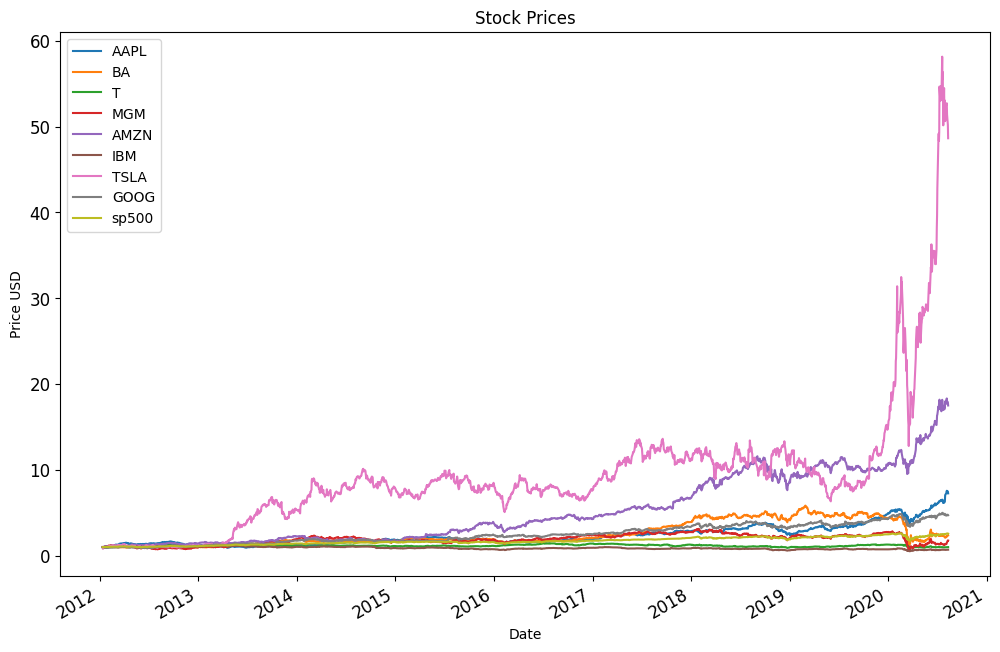

In [ ]:
plot_df(df_norm)

## Interactive data plot  

In [ ]:
# plot the normalized dataframe interactively
fig = px.line(df_norm, x=df_norm.index, y=df_norm.columns, title='Stock Prices')
fig.show()


# Task 5

## Function to calculate stocks daily returns

In [ ]:
# function that calculates daily stocks returns
def daily_returns(df):
    return df.pct_change(1)

# calculate daily returns
df_daily_returns = daily_returns(df)

df_daily_returns.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-13,-0.003749,-0.012051,-0.001660,0.018137,0.014153,-0.007699,-0.193274,-0.007385,-0.004948
2012-01-17,0.011648,0.008579,0.005986,-0.008097,0.018159,0.004689,0.167179,0.005744,0.003553
2012-01-18,0.010384,-0.002392,0.002645,0.039184,0.042827,0.005944,0.007895,0.006889,0.011108
2012-01-19,-0.003169,0.006661,0.002967,0.005499,0.026446,-0.003038,-0.001865,0.010523,0.004939


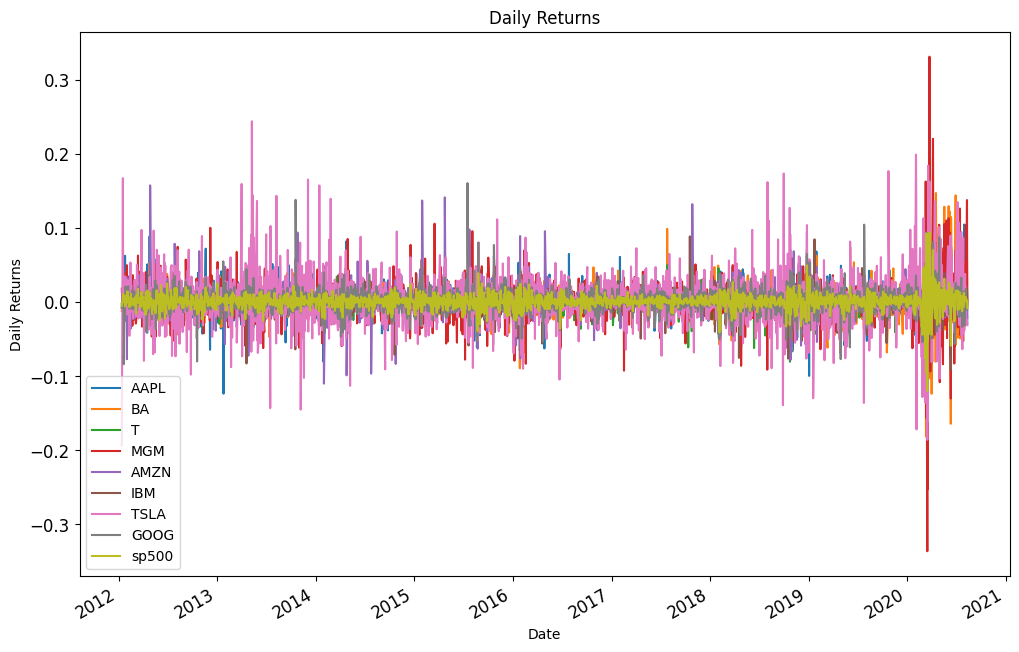

In [ ]:
# plot daily returns
plot_df(df_daily_returns, title="Daily Returns", ylabel="Daily Returns")

## Correlation between daily returns

In [ ]:
df_daily_returns.corr()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.385249,0.341373,0.384088,0.410233,0.434534,0.288534,0.509124,0.657320
BA,0.385249,1.000000,0.401602,0.554229,0.267466,0.479264,0.250946,0.388048,0.641826
T,0.341373,0.401602,1.000000,0.340166,0.233145,0.484219,0.152515,0.353695,0.617463
MGM,0.384088,0.554229,0.340166,1.000000,0.309016,0.441631,0.311879,0.439141,0.631449
AMZN,0.410233,0.267466,0.233145,0.309016,1.000000,0.339589,0.310083,0.575283,0.539560
IBM,0.434534,0.479264,0.484219,0.441631,0.339589,1.000000,0.245610,0.458816,0.703935
TSLA,0.288534,0.250946,0.152515,0.311879,0.310083,0.245610,1.000000,0.322804,0.387920
GOOG,0.509124,0.388048,0.353695,0.439141,0.575283,0.458816,0.322804,1.000000,0.684571
sp500,0.657320,0.641826,0.617463,0.631449,0.539560,0.703935,0.387920,0.684571,1.000000


### plot correlation matrix heatmap

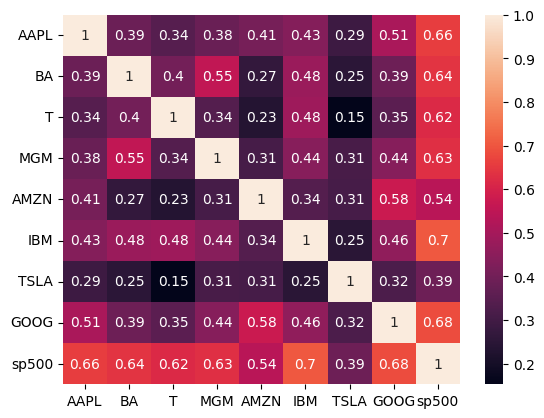

In [ ]:
# heat map of the correlation matrix
sns.heatmap(df_daily_returns.corr(), annot=True);

## top 2 stocks correlated to the S&P500

In [ ]:
df_daily_returns.corr()['sp500'].sort_values(ascending=False)

sp500    1.000000
IBM      0.703935
GOOG     0.684571
AAPL     0.657320
BA       0.641826
MGM      0.631449
T        0.617463
AMZN     0.539560
TSLA     0.387920
Name: sp500, dtype: float64

In [ ]:
print('The 2 stocks with the highest correlation with the sp500 are: ', df_daily_returns.corr()['sp500'].sort_values(ascending=False).index[1], ' and ', df_daily_returns.corr()['sp500'].sort_values(ascending=False).index[2])

The 2 stocks with the highest correlation with the sp500 are:  IBM  and  GOOG


### correlation

In [ ]:
corr1 = df_daily_returns.corr()['AMZN']['BA']
corr2 = df_daily_returns.corr()['MGM']['BA']

print('Correlation between Amazon and Boeing: ', round(corr1,3))
print('Correlation between MGM and Boeing: ', round(corr2,3))

Correlation between Amazon and Boeing:  0.267
Correlation between MGM and Boeing:  0.554


Economic interpretation: It's reasonable to assume that both MGM, owner of entertainment resorts, and Beoing, aircraft producer, will register positive economic results when the overall trend in economy is positive.
This because it's more likely that airline companies buy airplanes when it's forecasted high usage of the carriers themself, which is associable to tourists travelling the world and getting on the planes, the same as for MGM, so that people will spend money on travel-associated activities: casino, hotel, resorts...
This explains the pretty high correlation among MGM and Boeing.

The same can partially be true for Amazon, indeed that Amazon revenues will increase in favorable economic trend periods thanks to people expenditures for products found on the famous e-commerce.
However Amazon is also a technology giant, and its stock performance can be influenced by a wide range of factors beyond just consumer behavior during periods of staying at home.

### histograms of daily returns

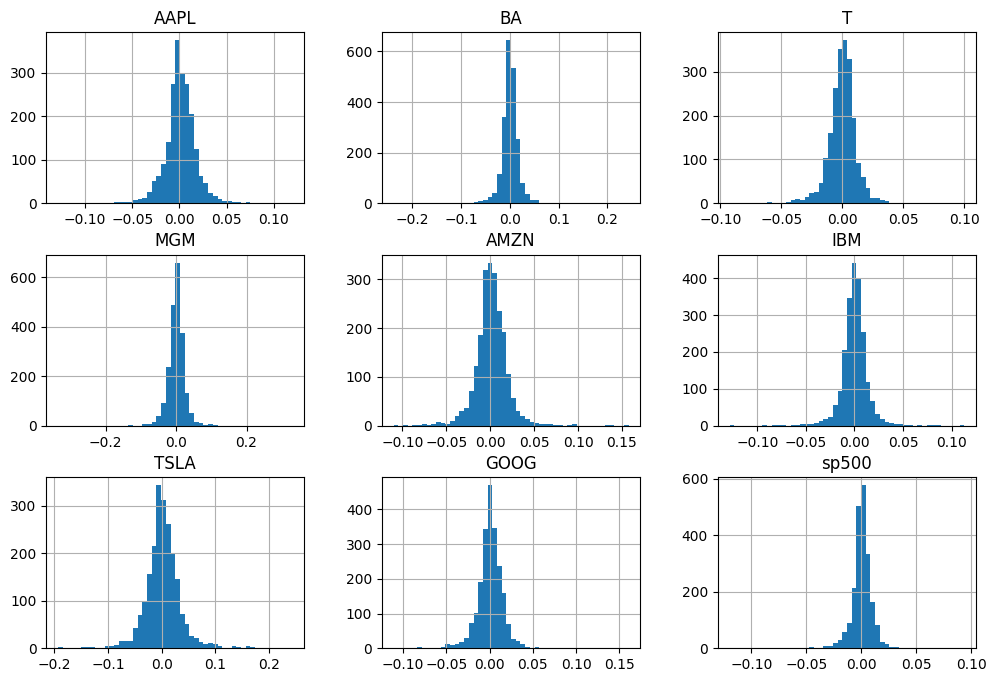

In [ ]:
# plot histogram from df_return
df_daily_returns.hist(bins=50, figsize=(12, 8));


The plotted distributions seem to resemble a normal distributions, so the assumption of normality can be a reasonable and practical approach.  Markovitz Portoflio Theory is designed to work well with normally distributed returns, and this simplifies the optimization process.

If normality holds we can apply mean-variance portfolio optimization and later identify the efficient frontier, so the portfolio with the highest expected return for a given level of risk.

In [ ]:
# Create a subplot for each stock's histogram
fig = sp.make_subplots(rows=len(df_daily_returns.columns), cols=1, shared_xaxes=True, subplot_titles=df_daily_returns.columns)

# Iterate through each column (stock) and create a histogram for it
for i, column in enumerate(df_daily_returns.columns):
    histogram = go.Histogram(x=df_daily_returns[column], nbinsx=50, name=column)
    fig.add_trace(histogram, row=i + 1, col=1)

# Update layout for the overall figure
fig.update_layout(
    title="Daily Returns Distribution for Each Stock",
    xaxis=dict(title="Daily Returns"),
    yaxis=dict(title="Frequency"),
    showlegend=False,
    height=400 * len(df_daily_returns.columns),  # Adjust the height based on the number of stocks
    width=800,
)

# Show the interactive subplot
fig.show()


# Task 6

## Portfolio weights

Function that:

- Simulates 1000 portfolios with random weights.

– Compute the return, the variance and the Sharpe ratio of each portfolio. 

– Return the maximum Sharpe ratio and its weights

In [ ]:
def portfolio_simulation(n, mean_returns, cov_matrix, risk_free_rate):
    '''
    return the maximum sharpe ratio, the weights of the portfolio with the maximum sharpe ratio
    and the dictionaries storing the results of the simulation
    '''
    np.random.seed(1) # set the seed for reproducibility

    # initialize dictionaries to store results
    portfolio_returns = {}
    portfolio_stds = {}
    portfolio_sharpe_ratios = {}
    
    n_assets = len(mean_returns)
    for i in range(n):
        
        # randomly assign weights to stocks
        weights = np.random.random(n_assets)
        weights /= np.sum(weights)
        
        # create dicts to store the results
        key = tuple(weights)
        portfolio_sharpe_ratios[key] = []
        portfolio_returns[key] = []
        portfolio_stds[key] = []
        
        # compute std and returns of the portfolio
        std, returns = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        
        # compute sharpe ration of the portfolio
        sharpe_ratio = (returns - risk_free_rate) / std
        
        # append results to corresponding dictionaries
        portfolio_returns[key].append(returns)
        portfolio_sharpe_ratios[key].append(sharpe_ratio)
        portfolio_stds[key].append(std)
        # compute maximum sharpe ratio and related weights
        max_sharpe_ratio = max(portfolio_sharpe_ratios.values())
        max_sharpe_ratio_weights = list(portfolio_sharpe_ratios.keys())[list(portfolio_sharpe_ratios.values()).index(max_sharpe_ratio)]
    
    return max_sharpe_ratio, max_sharpe_ratio_weights, portfolio_returns, portfolio_stds, portfolio_sharpe_ratios

First we build a function to compute the expected return and the standard deviation of a portfolio given the weights of the stocks in the portfolio.

As inputs it will take the simulated portfolio weights, the daily returns of the stocks and the variance-covariance matrix of the assets.

The second function we build is called 'portfolio_volatility' and it used to easy access the volatility of the portfolio, computed by the previous function.

In [ ]:
# function to compute portfolio return and volatility of the portfolio
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    
    # compute annualized portfolio returns
    returns = np.sum(mean_returns*weights ) * 252
    
    #compute annualized portfolio volatility
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    return std, returns

# function to compute just portfolio volatility
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

each of the three dictionaries has the following structure:

- key: tuple containing portfolio weights
- value: list containing the associated value (return, volatility, sharpe ratio)

In [ ]:
#portfolio_returns

Time to create the simulated portfolios!

In [ ]:
individual_expected_returns = df_daily_returns.describe().iloc[1,:]

# compute variance-covariance matrix of the assets
cov_matrix = df_daily_returns.cov()

# get the list of assets
assets = df_daily_returns.columns

# set the risk free rate
risk_free_rate = 0.034 ### T-Bills average annual return

n = 1000 # number of portfolio to simulate

## Tangency Portfolio

Let's find the weights of our tangency portfolio (assuming we are holding the risk-free asset).

In [ ]:
# find the portfolio with the highest sharpe ratio
max_sharpe_ratio, max_sharpe_ratio_weights, portfolio_returns, portfolio_stds, portfolio_sharpe_ratios = portfolio_simulation(n, individual_expected_returns, cov_matrix, risk_free_rate)

print('Stocks allocation of portfolio with highest Sharpe Ratio:\n')
for stock in range(len(assets)):
    print(f'{assets[stock]}:\t{max_sharpe_ratio_weights[stock]*100:.2f}%')

print('\nPortfolio perfomance:')

print('highest sharpe ratio: ', max_sharpe_ratio[0])
print(f'portfolio average annual return: {portfolio_returns[max_sharpe_ratio_weights][0]*100:.2f}%')
print(f'portfolio average annual volatility: {portfolio_stds[max_sharpe_ratio_weights][0]*100:.2f}%')

Stocks allocation of portfolio with highest Sharpe Ratio:

AAPL:	16.67%
BA:	9.06%
T:	8.12%
MGM:	0.49%
AMZN:	15.43%
IBM:	0.57%
TSLA:	26.90%
GOOG:	7.99%
sp500:	14.77%

Portfolio perfomance:
highest sharpe ratio:  1.180577589547977
portfolio average annual return: 31.85%
portfolio average annual volatility: 24.10%


Performance of the tangency portfolio of the sample period

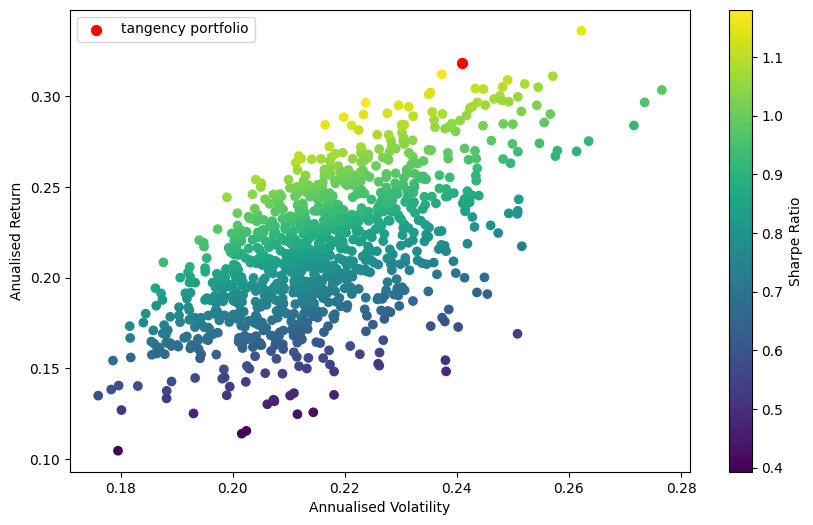

In [ ]:
# plot the returns of all portfolios and highlight the one with the highest sharpe ratio using the sharpe ratio 
plt.figure(figsize=(10, 6))
plt.scatter(list(portfolio_stds.values()), list(portfolio_returns.values()), c=list(portfolio_sharpe_ratios.values()), cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Annualised Volatility')
plt.ylabel('Anualised Return')
# highlight the portfolio with the highest sharpe ratio
plt.scatter(portfolio_stds[max_sharpe_ratio_weights], portfolio_returns[max_sharpe_ratio_weights], c='red', s=50,label='tangency portfolio') 
plt.legend()
plt.show()

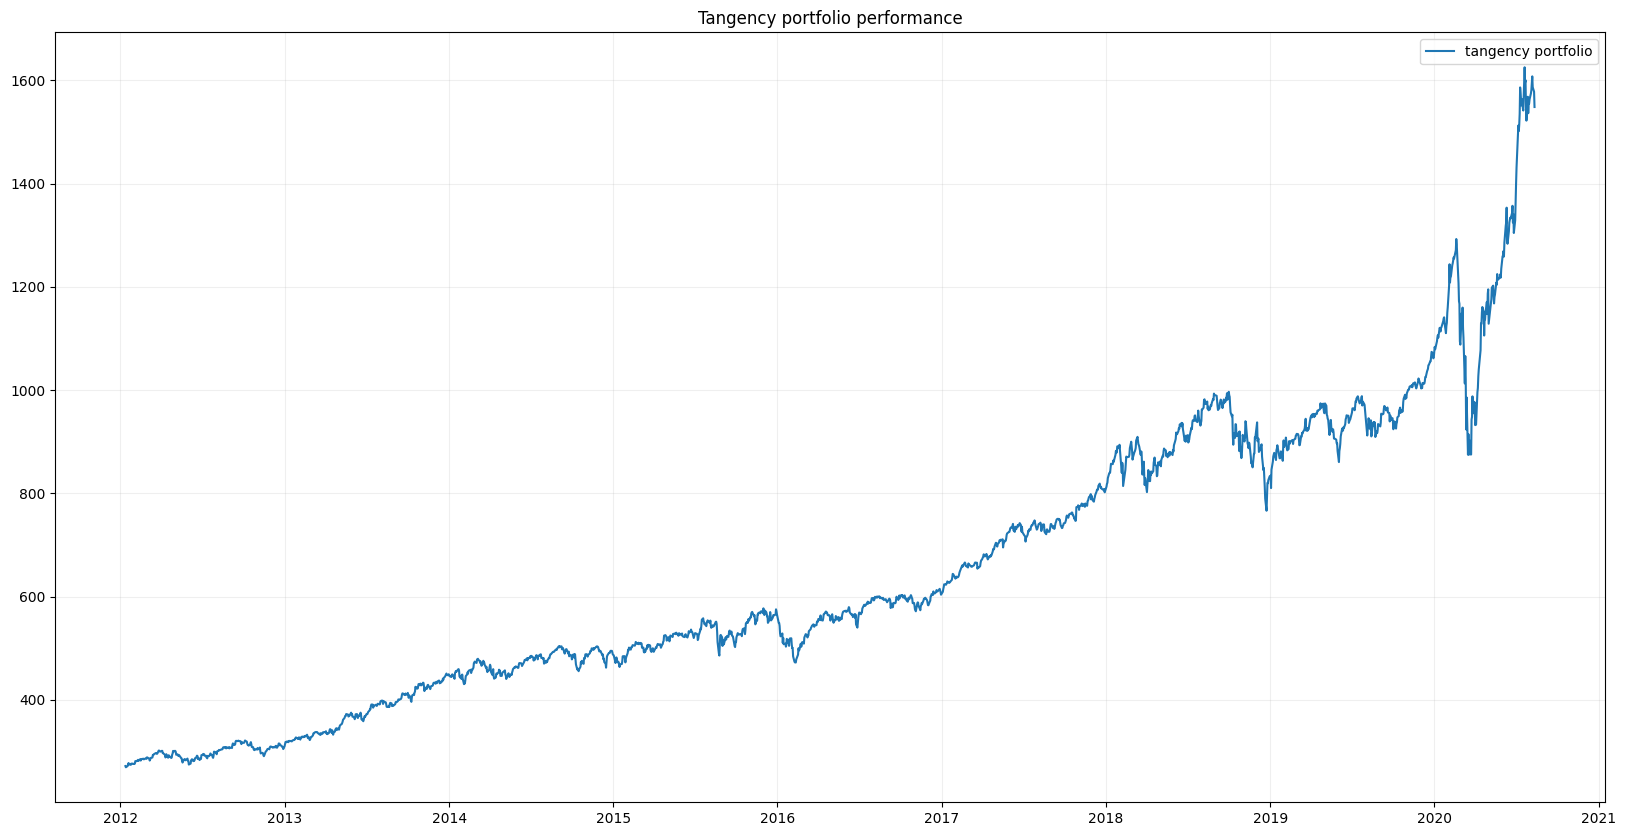

In [ ]:
df['tang_portf'] = np.sum(df * max_sharpe_ratio_weights, axis=1)
plt.figure(figsize=(20, 10))
plt.plot(df['tang_portf'], label='tangency portfolio')

plt.grid(alpha=0.2)
plt.legend()
plt.title('Tangency portfolio performance')
plt.show()


## Optional: Draw the efficient frontier


In [ ]:
def efficient_return(mean_returns, cov_matrix, target):
    '''
    find the most efficient portfolio for a given target return 
    using the Sequential Least Squares Programming optimization algorithm
    ''' 
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    # function to compute annual returns of a portfolio
    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    # set the constraints for the optimization
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target}, # --> minimizing this function we select a portfolio with a return as close as possible to the target return
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # --> in this way we are saying that the sum of the weights must be equal to 1
    
    bounds = tuple((0,1) for asset in range(num_assets)) # --> for each asset we specify the minimum and maximum weight (0,1)
    
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


# find the efficient frontier
def efficient_frontier(mean_returns, cov_matrix, returns_range):
    '''
    a range of target returns and compute efficient portfolio for each return level
    '''
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [ ]:
# compute efficient frontier based on the data
ef = efficient_frontier(individual_expected_returns, cov_matrix, np.linspace(0, 0.4 , 50))
# extract the results from the efficient frontier
res = [p['fun'] for p in ef]

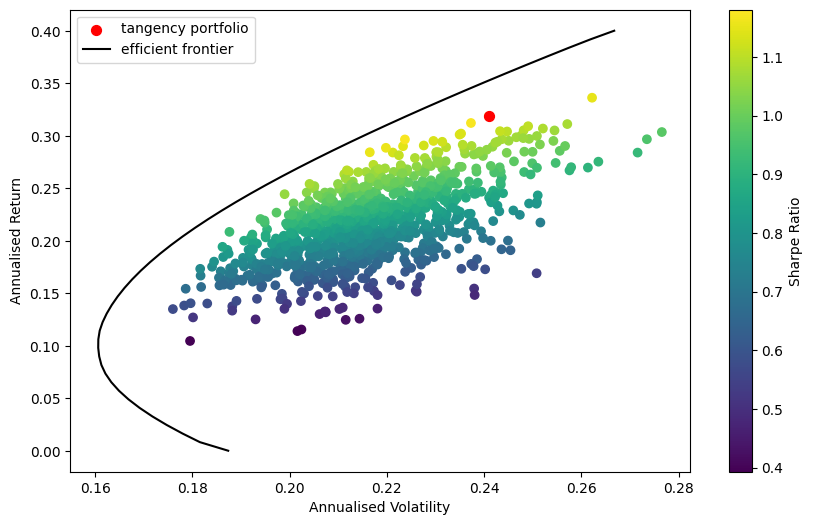

In [ ]:
# plot simulation results together with the efficient frontier

plt.figure(figsize=(10, 6))
plt.scatter(list(portfolio_stds.values()), list(portfolio_returns.values()), c=list(portfolio_sharpe_ratios.values()), cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Annualised Volatility')
plt.ylabel('Annualised Return')
plt.scatter(portfolio_stds[max_sharpe_ratio_weights], portfolio_returns[max_sharpe_ratio_weights], c='red', s=50, label='tangency portfolio') # plot the portfolio with the highest sharpe ratio
plt.plot(res, np.linspace(0, 0.4 , 50), linestyle='-', color='black', label='efficient frontier')
plt.legend()
plt.show()


# Task 7

In [ ]:
df_first_phase = df[df.index < '2017-01-01']
del df_first_phase['tang_portf']
df_first_phase.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:
# compute daily returns of the first phase 2012-2016
df_daily_returns_1 = daily_returns(df_first_phase)
individual_expected_returns = df_daily_returns_1.describe().iloc[1,:]

# compute variance-covariance matrix of the assets
cov_matrix = df_daily_returns_1.cov()

# get the list of assets
assets = df_daily_returns_1.columns

# set the risk free rate
risk_free_rate = 0.034 ### T-Bills average annual return

n=1000

In [ ]:
# find the portfolio with the highest sharpe ratio
max_sharpe_ratio, max_sharpe_ratio_weights, portfolio_returns, portfolio_stds, portfolio_sharpe_ratios = portfolio_simulation(n, individual_expected_returns, cov_matrix, risk_free_rate)

print('Stocks allocation of portfolio with highest Sharpe Ratio:\n')
for stock in range(len(assets)):
    print(f'{assets[stock]}:\t{max_sharpe_ratio_weights[stock]*100:.2f}%')

print('\nPortfolio perfomance:')

print('highest sharpe ratio: ', max_sharpe_ratio[0])
print(f'portfolio average annual return: {portfolio_returns[max_sharpe_ratio_weights][0]*100:.2f}%')
print(f'portfolio average annual volatility: {portfolio_stds[max_sharpe_ratio_weights][0]*100:.2f}%')

Stocks allocation of portfolio with highest Sharpe Ratio:

AAPL:	0.65%
BA:	1.58%
T:	3.22%
MGM:	12.20%
AMZN:	24.22%
IBM:	2.81%
TSLA:	26.97%
GOOG:	24.94%
sp500:	3.41%

Portfolio perfomance:
highest sharpe ratio:  1.2243234299915782
portfolio average annual return: 31.73%
portfolio average annual volatility: 23.14%


In [ ]:
df_second_phase = df[df.index >= '2017-01-01']
del df_second_phase['tang_portf']

In [ ]:
df_second_phase['tang_portf'] = np.sum(df_second_phase * max_sharpe_ratio_weights, axis=1)

/tmp/ipykernel_39/1804623706.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_daily_returns_2 = daily_returns(df_second_phase)

In [ ]:
df_daily_returns_2

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,tang_portf
Date,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.010512,-0.005811,-0.000678,0.004657,0.012381,0.046085,0.000967,0.005722,0.008064
2017-01-05,0.005085,0.000567,-0.002806,-0.003055,0.030732,-0.003309,-0.001057,0.009048,-0.000771,0.013671
2017-01-06,0.011148,0.002457,-0.031184,0.005107,0.019912,0.004920,0.009967,0.015277,0.003517,0.014270
2017-01-09,0.009159,-0.004903,-0.012585,-0.012195,0.001168,-0.011090,0.009912,0.000620,-0.003549,0.001040
...,...,...,...,...,...,...,...,...,...,...
2020-08-05,0.003625,0.055794,-0.005332,0.000000,0.021091,-0.003099,-0.001332,0.005898,0.006430,0.011215
2020-08-06,0.034889,-0.011935,-0.000335,0.104067,0.006231,0.005341,0.003071,0.017976,0.006428,0.008204
2020-08-07,-0.024495,-0.012660,0.006032,0.030878,-0.017842,-0.009198,-0.024752,-0.003740,0.000633,-0.015011


In [ ]:
realized_returns = df_daily_returns_2['tang_portf'].mean() * 252

realized_volatility = df_daily_returns_2['tang_portf'].std() * np.sqrt(252)

In [ ]:
realized_returns, realized_volatility

(0.34583758155448446, 0.2639498253079956)

It performs even better overall, even though it also suffers from a little bit higher volatility.

## TASK 7 OPTIONAL

In [ ]:
# setting the parametes 
start_date = 2012
end_date = 2020

# create a list of the years
years = list(range(start_date, end_date+1, 1))

# extract the year of each date
df['year'] = df.index.year

assets = df_daily_returns_1.columns

n=1000

# set the risk free rate
risk_free_rate = 0.034 ### T-Bills average annual return

In [ ]:
# set lists to store perfomances
e_volatility = []
e_returns = []
volatility = []
returns = []
performance = pd.DataFrame()

print('Stocks allocation of portfolio with highest Sharpe Ratio for each year:\n')
for year in years[1:]:
    # set the dataframe to choose the best portfolio based on the previous year data
    df_train = df[df['year']==year-1][list(assets)]
    # set the dataframe to analyse the perfomrmance of the selected portfolio
    df_test = df[df['year']==year][list(assets)]

    # portfolio simulation
    df_train_daily_returns = daily_returns(df_train)
    individual_expected_returns = df_train_daily_returns.describe().iloc[1,:]

    # compute variance-covariance matrix of the assets
    cov_matrix = df_train_daily_returns.cov()

    # find the portfolio with the highest sharpe ratio
    max_sharpe_ratio, max_sharpe_ratio_weights, portfolio_returns, portfolio_stds, portfolio_sharpe_ratios = portfolio_simulation(n, individual_expected_returns, cov_matrix, risk_free_rate)

    # store expected performance
    e_volatility.append(portfolio_stds[max_sharpe_ratio_weights][0])
    e_returns.append(portfolio_returns[max_sharpe_ratio_weights][0])

    # compute daily returns for the current year using the weights associated with highest sharpe ratio of previous year
    df_test['tang_portf'] = np.sum(df_test * max_sharpe_ratio_weights, axis=1)

    df_test_daily_returns = daily_returns(df_test)

    # annualise daily returns and volatility
    realized_returns = df_test_daily_returns['tang_portf'].mean() * 252
    realized_volatility = df_test_daily_returns['tang_portf'].std() * np.sqrt(252)

    # store realised performance
    volatility.append(realized_volatility)
    returns.append(realized_returns)
    performance = pd.concat([performance, df_test['tang_portf']])  

    print(year,'\n')
    for stock in range(len(assets)):
        print(f'{assets[stock]}:\t{max_sharpe_ratio_weights[stock]*100:.2f}%')

    print('\nPortfolio perfomance:')

    print('highest sharpe ratio: ', max_sharpe_ratio[0])
    print(f'Expected portfolio average annual return: {e_returns[-1]*100:.2f}%')
    print(f'Actual portfolio average annual return: {realized_returns*100:.2f}%')
    print(f'Expected portfolio average annual volatility: {e_volatility[-1]*100:.2f}%')
    print(f'Actual portfolio average annual volatility: {realized_volatility*100:.2f}%\n\n')

    

Stocks allocation of portfolio with highest Sharpe Ratio for each year:

2013 

AAPL:	30.81%
BA:	8.86%
T:	4.43%
MGM:	0.59%
AMZN:	27.19%
IBM:	5.43%
TSLA:	5.36%
GOOG:	11.64%
sp500:	5.70%

Portfolio perfomance:
highest sharpe ratio:  1.1712573187953101
Expected portfolio average annual return: 25.50%
Actual portfolio average annual return: 34.44%
Expected portfolio average annual volatility: 18.87%
Actual portfolio average annual volatility: 13.96%


2014 

AAPL:	0.10%
BA:	22.88%
T:	3.88%
MGM:	13.70%
AMZN:	15.03%
IBM:	0.19%
TSLA:	11.47%
GOOG:	14.27%
sp500:	18.47%

Portfolio perfomance:
highest sharpe ratio:  3.6131069104129927
Expected portfolio average annual return: 60.75%
Actual portfolio average annual return: 6.62%
Expected portfolio average annual volatility: 15.87%
Actual portfolio average annual volatility: 13.71%


2015 

AAPL:	25.29%
BA:	2.15%
T:	1.29%
MGM:	1.52%
AMZN:	4.64%
IBM:	12.20%
TSLA:	29.49%
GOOG:	3.42%
sp500:	19.99%

Portfolio perfomance:
highest sharpe ratio:  1.016711

In [ ]:
# compute average performance
print(f'Expected average volatility: {np.mean(e_volatility)*100:.2f}%')
print(f'Actual average volatility: {np.mean(volatility)*100:.2f}%\n')

print(f'Expected average returns: {np.mean(e_returns)*100:.2f}%')
print(f'Actual average returns: {np.mean(returns)*100:.2f}%')



Expected average volatility: 18.03%
Actual average volatility: 19.66%

Expected average returns: 31.53%
Actual average returns: 23.31%


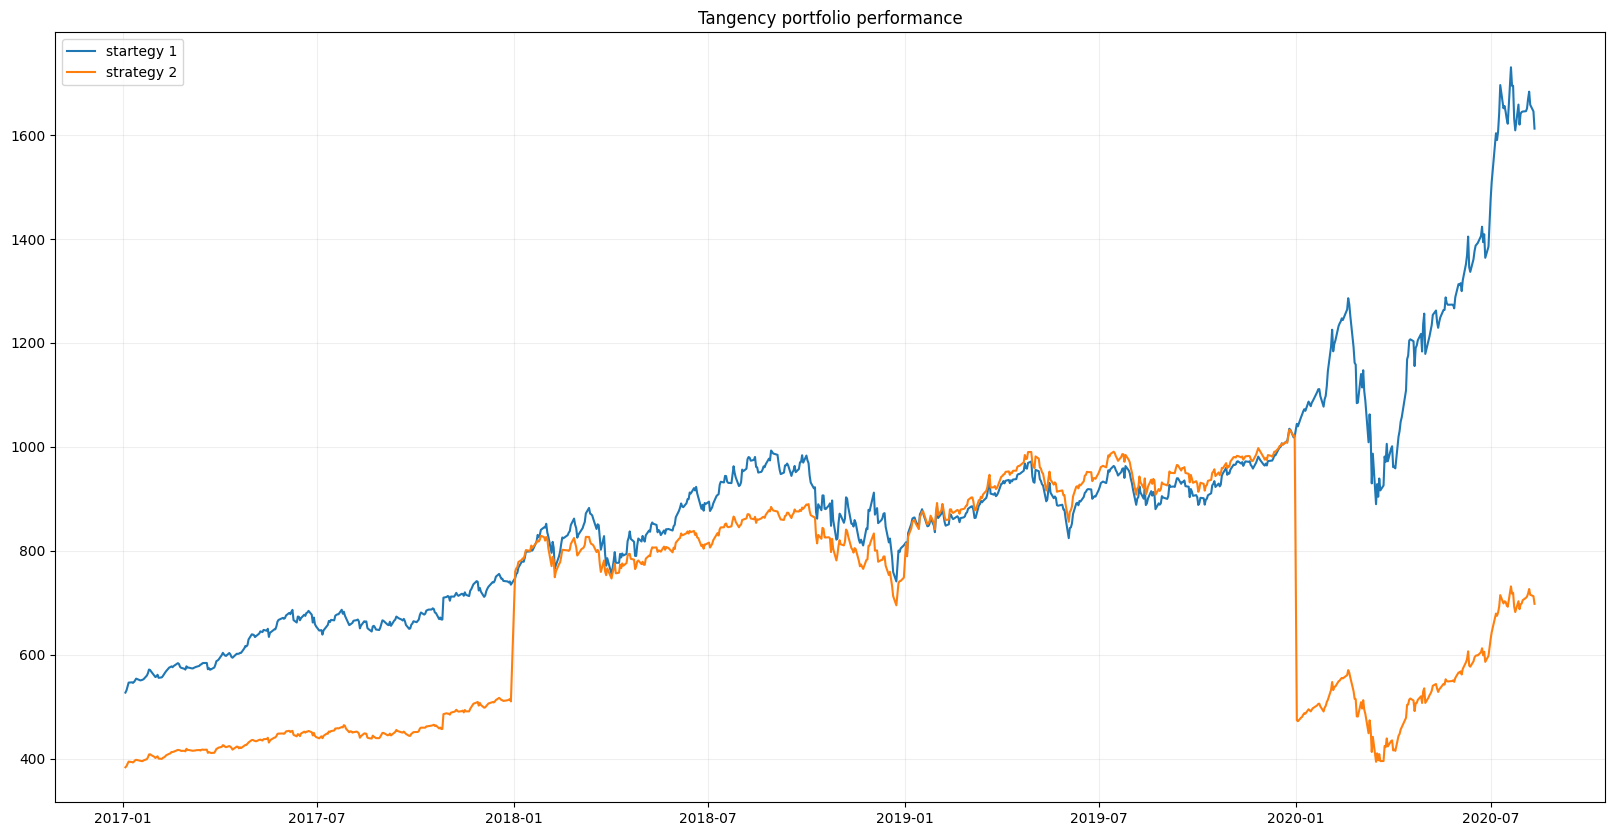

In [ ]:
plt.figure(figsize=(20, 10))
# plot the performance of the first strategy (optimizing the portfolio based on 2012-2016 data)
plt.plot(df_second_phase['tang_portf'], label='startegy 1')
# plot the performance of the second strategy (optimizing the portfolio each year)
plt.plot(performance[performance.index>='2017-01-01'], label = 'strategy 2')
plt.grid(alpha=0.2)
plt.legend()
plt.title('Tangency portfolio performance')
plt.show();

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6fe42355-e69d-421f-97ba-b192c095cb5d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>